## Task # 3 - To Explore Unsupervised Machine Learning



From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.

Nikita Nagraj

In [55]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [56]:
#Load data
data=pd.read_excel("Iris.xlsx")

In [57]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [60]:
data.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [61]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## No missing values

## Visualization

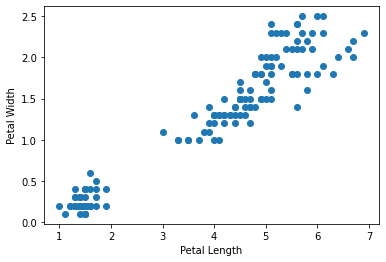

In [62]:
plt.scatter(data.PetalLengthCm,data.PetalWidthCm)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

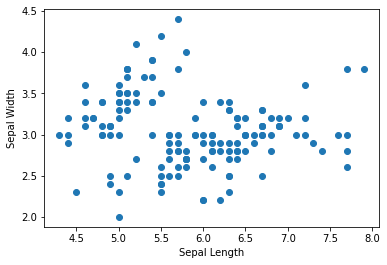

In [63]:
plt.scatter(data.SepalLengthCm,data.SepalWidthCm)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

#Let's plot our data points, so that we can have a better understanding of our data and it's distribution

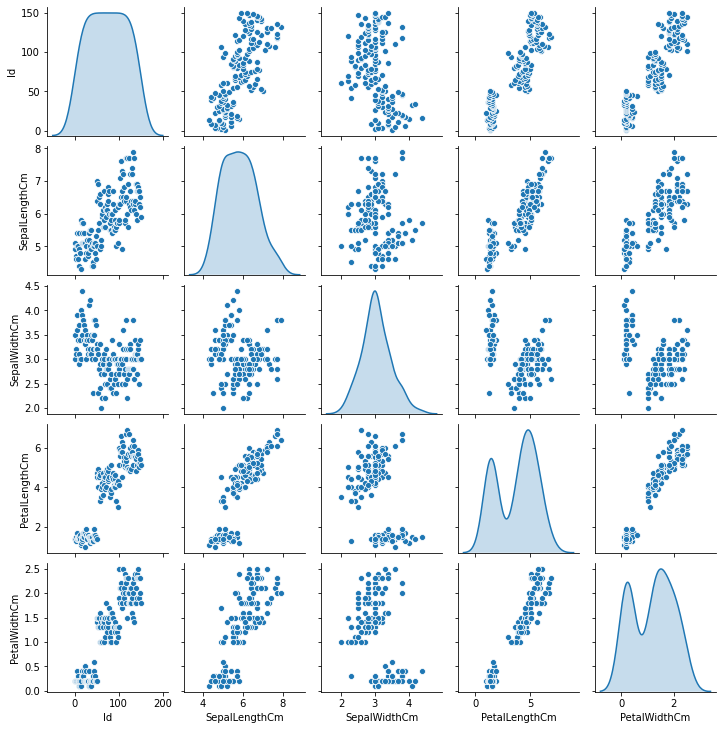

In [64]:
import seaborn as sns
sns.pairplot(data, height=2, diag_kind="kde")

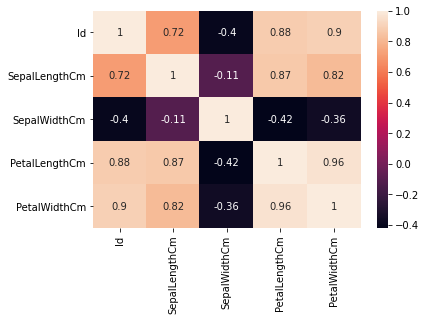

In [65]:
sns.heatmap(data.corr(),annot=True,cmap='rocket')

Text(0.5, 0, 'Species')

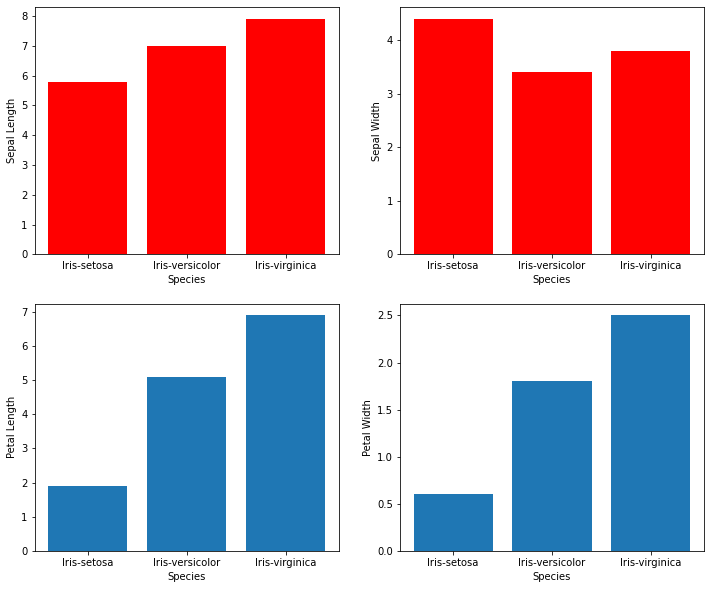

In [66]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.bar(data.Species,data.SepalLengthCm,color='red')
plt.ylabel('Sepal Length')
plt.xlabel('Species')
plt.subplot(222)
plt.bar(data.Species,data.SepalWidthCm, color='red')
plt.ylabel('Sepal Width')
plt.xlabel('Species')
plt.subplot(223)
plt.bar(data.Species,data.PetalLengthCm)
plt.ylabel('Petal Length')
plt.xlabel('Species')
plt.subplot(224)
plt.bar(data.Species,data.PetalWidthCm)
plt.ylabel('Petal Width')
plt.xlabel('Species')

##Training

In [67]:
#dropping 'Species' column from dataset.
iris=data.drop('Species',axis=1)

In [68]:
feature = iris.columns[1:]
for i in enumerate(feature):
    print(i)

(0, 'SepalLengthCm')
(1, 'SepalWidthCm')
(2, 'PetalLengthCm')
(3, 'PetalWidthCm')


## K-Means Clustering

##Finding the Optimal Number of Clusters for KMeans Clustering :
Elbow Method (SSD - Sum of Squared Distance)

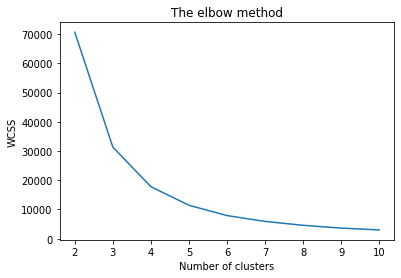

In [70]:

import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ssd=[]
for k in range(2,11):
  kmean=KMeans(n_clusters=k).fit(iris)
  ssd.append([k,kmean.inertia_])

plt.plot(pd.DataFrame(ssd)[0],pd.DataFrame(ssd)[1])
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [71]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
x = iris.iloc[:, [1, 2, 3 , 4]].values
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

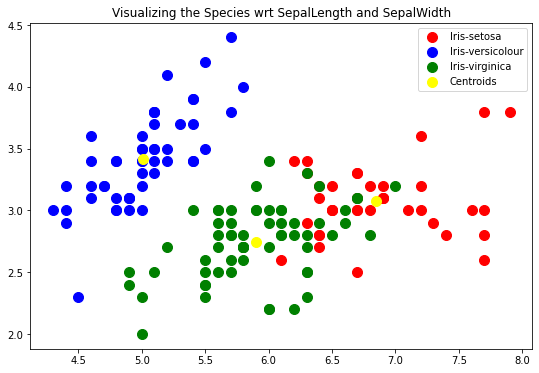

In [72]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(9,6))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title("Visualizing the Species wrt SepalLength and SepalWidth")

plt.legend()

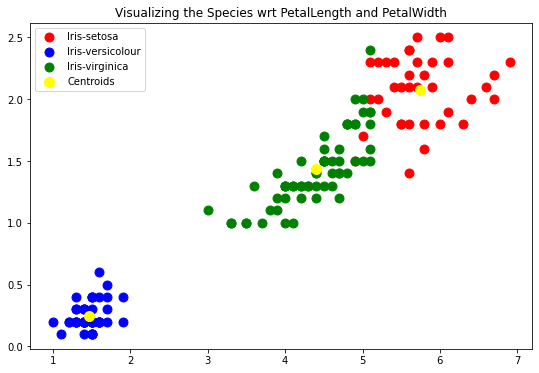

In [73]:
# Visualising the clusters - On the last two columns
plt.figure(figsize=(9,6))

plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], 
            s = 80, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], 
            s = 80, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],
            s = 80, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title("Visualizing the Species wrt PetalLength and PetalWidth")

plt.legend()